# Notes on the Julia Language

**Revised September 23, 2022**

These notes are not intended to teach the Julia language from scratch, or comprehensively;
instead they are addressed to readers who already know somewhat similar tools like Matlab or "Python Scientific" (Python + Numpy + Matplotlib),
and they focus on the parts of Julia actually used in this book.

A very short version of the story is that what works in Matlab often also work in Julia;
one design principle is offering familiarity for Matlab users by having the Matlab syntax work (at least as one option)
except where that would get in the way of moderization.
Though some syntax comes from Python and some from C.
And one bit is from Perl.

An intermediate version is this summary of
[Julia's noteworthy differences from other languages](https://docs.julialang.org/en/v1/manual/noteworthy-differences/),
with comparisons to Matlab and Python (and also to R and C/C++).

For the full story, see resources like [the official Julia documentation](https://docs.julialang.org/en/v1/).
(Don't read it all at once: the PDF version is over 1500 pages.)




<a name="charactersstrings"></a>
## Characters and strings

The character set is Unicode via UTF-8, so Greek letters and much more are usable.

I generally advise against going beyond plain old ASCII characters, but see the functions
[plu](NumericalMethods#plu)
and
[forwardsubstitution](NumericalMethods#forwardsubstitution)
in the collection {doc}`NumericalMethods`
where Unicode is used to illustrate the possibility of following mathematical notation more closely.

The usual style is that the names of variable and functions use only (Roman alphabet) letter, digits, and possibly underscores to separate words in names that are descriptive phrases.

In [137]:
println("π/2 = ", π/2)

π/2 = 1.5707963267948966


(That function `println` will be explained below in [Displaying values](#displayingvalues).)

So not only is $\pi$ is the character set; it is the name of predefined constant.
(which can also be referred to as `pi`)

Typing such characters is done using LaTeX notation and tabbing:
for $\pi$, type the three character sequence `\pi` and then press TAB.


The above characters are in single right quotes (to be pedantic, apostrophes),
whereas strings of characters must be surrounded, more properly, by double quote characters:

    "This is a string"
    'This is a syntax error'

This one comes from C, I think.

*Aside:* here is a quirky use of Unicode built in to Julia:

In [138]:
√4

2.0

<a name="concatenationduplication"></a>
### String concatenation and duplication

To concatenate two strings, "multiply" them with `*`. (Versus "adding" them as in Python.)

Also, consistent with that, making multiple copies of a string is done by "exponentiation", with `^`:

In [139]:
greeting = "Hello"
audience = "world"
sentence = greeting * ' ' * audience * '.'
println(sentence)
println((greeting*' ')^3)

Hello world.
Hello Hello Hello 


Note that single characters can also be concatenated into strings, and exponentiated:

In [140]:
gamma = 'g' * 'a' * 'm'^2 * 'a'

"gamma"

<a name="displayingvalues"></a>
## Displaying values: `println`, `print` and just saying the name

We have seen above two basic ways of getting output displayed on the screen:
- the function `println`
- putting an expression on the last line of a cell (or typing it into the interactive Julia command line),
which causes that expression to be evaluated and the result displayed.
This is as in both Matlab and Python, and with the same method for supressing output: ending that line with a semi-colon.

The basic usage of function `println` is as for the synonymous function in Matlab and `print` in Python:
input is a sequence of strings whose values are ouptut on a line, after which output moves to a newline.

There is also a variant `print` which does not go to a new line at the end; useful for assembling a line of output piece-by-piece:

In [141]:
println("The"," end.")
println()
print("That's")
print(" all")
print(" folks")
println("!")

The end.

That's all folks!


Note that in each case, the spaces must be explicitly specified.
Also, the sequence of strings can be empty: get just a blank line with `println()`.

<a name="displayingvaluesofexpressions"></a>
## Displaying the values of variables and expressions

As already seen above, there are several ways of display the value of a variable, or more generally of an expression.

One is to put such expressions in the sequence of arguments to `println` (so I lied slightly about the arguments being strings):

In [142]:
a = 2
println("a = ", a, " and its cube is ", a^3)

a = 2 and its cube is 8


Another is to use '$' interpolation, adopted from the Perl language:

In [143]:
println("a = $a and its cube is $(a^3)")

a = 2 and its cube is 8


When the expression whose value to interpolate is just a variable name, it is enough to prefix that name by '$'.
However more involved expressions must be parenthesised, as with `$(a^3)`.

Fun fact: the string in the last example is an expression whose value is the string displayed,
so its value can also be displayed by simply having it as the last (and semicolon-free) line of a cell:

In [144]:
"a = $a and its cube is $(a^3)"

"a = 2 and its cube is 8"

This is useful to know since it reveals a nice "orthogonality of features":
interpolation is not a special feature of function `println` but something that can be used in other situations;
probably the most common use in this book will be putting annotations on graphs.

Sometimes it is illuminating to use the "last line automatic display" feature rather than `print` because it reveals some information about the type of a quantity rather than just its value.
This book uses that often when discussing Julia language features rather than when actually doing numerical computing;
see for example the notes on [arrays](#arrays) below.

On the other hand, many expressions give output values that you might not expect, like the definitions of [functions](#functions1) and  function `plot` in the notes on [modules](#modules) below;
thus you might want to end many cells with a semi-colon to supress unneeded output.
An end-of-line semi-colon never hurts, even where redundant, so you may type like a C programmer if you wish.


Semicolons can also be used to combine statements on a single line.
This is often considered as poor style, but I sometimes find that it improves readability with several short and closely related statements:

In [145]:
a = 1; b = 3
print("a=",a,", b=",b)

a=1, b=3

<a name="boolean"></a>
## Boolean values (true-false)

These are `true` and `false` and nothing else:
- not capitalized as they are in Python
- not "1" and "0" or "nonzero" vs "zero" or any other laziness.

The logical operators are much as in C: "&&", "||", "&", "|", and "!" for negation.

Be careful with that last one; logical negation is not "~" as in Matlab.

The doubled forms "&&" and "||" use lazy or "short-circuiting" evaluation:
if the value the left-hand term determines the truth value of the whole, then the second term is not evaluated.
For example, the following avoids division by zero:

    if q != 0 && -1 < p/q < 1
        println("$p/$q is a proper fraction")
    else
        println("$p/$q is not a proper fraction")
    end

<a name="comparisons"></a>
## Comparisons

The usual comparisons of numbers and tests for equality exist,

    < <= == >= !=
with a couple of extra twists.

the first is the comparisons can be chained, as seen above:

    -1 < p/q < 1
is equivalant to

    -1 < p/q && p/q < 1
but both more readable and more efficient, because the middle term is only evaluated once.
Like `&&`, this is short-circuiting.

(This one comes from Python, the only other language I know of with this feature.)

This can even be done in cases where usual mathematical style forbids, with reversing of the direction of the inequalities:

In [1]:
2 < 4 > 3

true

The second extra is the function `isequal(a, b)`.
This is mostly the same as `==` but with some special handling for the special values `-0.0` and `NaN` of IEEE floating point numbers:

In [146]:
NaN == NaN

false

In [147]:
isequal(NaN, NaN)

true

In [148]:
-0.0 == 0.0

true

In [149]:
isequal(-0.0, 0.0)

false

<a name="numbers"></a>
## Numbers

As just mentioned, the default floating point numbers and arithmetic are IEEE Float64, and the default integers are Int64;
others are available (like Int32 and unsigned integers) but they will not be mentioned again in this book.

Thus the main novelty here is a notation:
the underscore can be used within numbers to improve readabilty, as commas are (and periods in some countries.)
They can be put wherever you like:

In [150]:
two_thousand_million = 2_000_000000  # British English
println("two_thousand_million is ",two_thousand_million)
crore = 1_00_00_000  # This is where Indian style puts the commas
println("In the Indian number naming system, one crore is $crore")
almostpi = 3.1415_9265
println("pi is approximately $almostpi")

two_thousand_million is 2000000000
In the Indian number naming system, one crore is 10000000
pi is approximately 3.14159265


A point on recommended style: although floating point numbers can be typed with the decimal point at the beginning or the end,
as with `2.` and `.5`,
it is recommended style to always have digits around the decimal point, as with `2.0` and `0.5`.

One reason is that the period '.' is used with many other meanings, so this style helps to avoid ambiguities;
see below about [vectorization](#arithemeticonarrays).

<a name="complexnumbers"></a>
### Complex numbers

Julia uses `im` for the square root of -1 rather than `i` or `j`, and `im` cannot be used as the name of a variable.

In general, the complex number $a + b i$ is expressed as `a + bim` where 'b' is a literal number,
not the name of a variable.
Then `im` is immediately juxtaposed with that number, no intervening space allowed).

In [151]:
z = 3 + 4im
println("z = ", z)
println("Its absolute value is ", abs(z))

z = 3 + 4im
Its absolute value is 5.0


As you might expect, imaginary numbers can be written without the real part $a$, as `bim` and when $b=1$, it can be ommited

However, the imaginary part `b` is always needed, even when $b = 0$, to announce that the nuber is to br treated a complex.

In [152]:
println(2im)

0 + 2im


In [153]:
println(im)

im


In [154]:
println(im^2)

-1 + 0im


In [155]:
println(-1im)

0 - 1im


In [156]:
println(-im)

0 - 1im


However, the imaginary part `b` is always needed, even when $b = 0$, to announce that the number is to be treated a complex.

In [157]:
sqrt(-1 + 0im)

0.0 + 1.0im

In [158]:
sqrt(-1)

LoadError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

The name `im` is reserved for this role; it cannot be used as a variable name:

In [159]:
im = 100

LoadError: cannot assign a value to variable Base.im from module Main

<a name="arithemeticoperators"></a>
## Arithemetic operators

With arithmetic on numbers, the main items to note are
1. exponentiation
2. division with integers, and
3. multiplication by juxtoposition

- Exponentiation $a^b$ is given by `a^b` (as in Matlab and different from Python's `a**b`).

- `p/q` with `p` and `q` both integers promotes to floating point arithmetic.

- To do integer division with integer result, use `p ÷ q` (or `div(p,q)` to avoid that Unicode: all operators also have function forms).

- The remainder is given by `p%q`, or `rem(p,q)`. Thus `(p ÷ q)* q + p%q = p`

- There is also "backward division": `q\p` is the same as `p/q`; see below.

- The product of a literal number by a variable or function value can be indicated by juxtoposition, no '*' needed:

In [160]:
println(2π)
println(4tan(pi/4))

6.283185307179586
3.9999999999999996


(julia-language-arrays)=
## Arrays

Julia has numerical arrays bult in, and the basic construction notation is much as in Matlab, with semicolons separating rows.
However, not everything is a matrix of real numbers:
- Integer values are supported.
- There is a distinction between matrices and vectors, with the latter being equivalent to single column matrices.
- Single row matrices are still considered as matrices.

This all follows common mathematical conventions, and so does multiplication.

Vectors (1-index arrays) are created with bracketed, comma separated lists;
note the column vector presentation.

In [161]:
v = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

Matrices are created with rows separated by semicolons and elements with a row separated only by spaces:

In [162]:
A = [ 1.0 2.0 3.0 ; 4.0 5.0 6.0 ]

2×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0

Note the difference from vector `v` above:

In [163]:
u = [ 1 2 3 ]

1×3 Matrix{Int64}:
 1  2  3

On the other hand, a vector can be created as a one-column matrix:

In [164]:
v_as_matrix = [ 1 ; 2 ; 3 ]

3-element Vector{Int64}:
 1
 2
 3

In [165]:
v == v_as_matrix

true

In [166]:
v == u

false

In [167]:
u * v  # like u-transpose times v; the inner product

1-element Vector{Int64}:
 14

In [168]:
outer = v * u  # The outer product

3×3 Matrix{Int64}:
 1  2  3
 2  4  6
 3  6  9

In [169]:
v * v  # vector times vector, a mismatch

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *(::StridedVecOrMat, [91m::LinearAlgebra.Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/lq.jl:269
[0m  ...

A row matrix can be converted to a vector with function `collect`, which we will see again below.

In [170]:
collect(v)

3-element Vector{Int64}:
 1
 2
 3

<a name="arrayindexingslicing"></a>
### Array indexing and slicing

Indices run from 1 (like Matlab, unlike Python), **but** indices are indicated with brackets
(like Python, unlike Matlab — which uses parentheses for too many things!)

In [171]:
v[1]

1

In [172]:
A[2,3]

6.0

**Be careful with single indexing a higher dimensional array.**

This treats the elements of the array as if laid out in a singe row ("flattened"), rather than selecting a row as in Python.

In [173]:
A[1], A[2], A[3], A[4], A[5], A[6]

(1.0, 4.0, 2.0, 5.0, 3.0, 6.0)

Also note the order: the columns are joined end-to-end, not the rows:
Julia follows Matlab (and Fortran) in storing arrays in **column-major order**, 
as opposed to the **row-major order** of Python (and C ,and Java, and in general in languages that count fom zero.)

One can also index expressions directly

In [174]:
(v*u)[2,2]

4

Indexing part of an array can be done with **slicing** which works mostly as in Matlab.

The basic form is `first:last`, selecting indices from `first` to `last` *inclusive* (like Matlab, unlike Python)

In [175]:
v[2:3]

2-element Vector{Int64}:
 2
 3

In [176]:
A[1:2,2:3]

2×2 Matrix{Float64}:
 2.0  3.0
 5.0  6.0

The final index value can be indicated by `end`, and index arithmetic can be done on this:

In [177]:
println("The last entry in v is ", v[end], ", the penultimate is ", v[end-1])
println("The last two columns of A are")
A[1:end, end-1:end]

The last entry in v is 3, the penultimate is 2
The last two columns of A are


2×2 Matrix{Float64}:
 2.0  3.0
 5.0  6.0

When the slice on an index is all values, one can use `:` instead of `1:end`.
So the previous example could also be done as

In [178]:
A[:, end-1:end]

2×2 Matrix{Float64}:
 2.0  3.0
 5.0  6.0

One can also specify an arbitrary collection of indices by giving a bracketed list (a one index array) of indices.

For example, The "corners" of the outer product `u * v`, flipped vertically, are

In [179]:
outer[[3,1], [1,3]]

2×2 Matrix{Int64}:
 3  9
 1  3

and we can permute rows like this

In [180]:
outer[[3,1,2],:]

3×3 Matrix{Int64}:
 3  6  9
 1  2  3
 2  4  6

A tricky point: slicing to a single row matrix vs slicing to a vector.

For some matrix-vector caclulations is is necessary to ensure that an object is a "1 by n" row matrix rather than an n-vector (which is an "n by 1" column matrix) but unfortunately, **slicing out a single row of matrix returns a vector:**

In [181]:
A[1,:]  # gives a vector, a.k.a. a 1 column matrix

3-element Vector{Float64}:
 1.0
 2.0
 3.0

To keep the slice as a row, indicating the row as `[i]` rather than just `i`:

In [182]:
A[[1],:]  # gives a 1 row matrix

1×3 Matrix{Float64}:
 1.0  2.0  3.0

So this works as an outer product

In [183]:
[3, 4, 5] * A[[1],:]

3×3 Matrix{Float64}:
 3.0   6.0   9.0
 4.0   8.0  12.0
 5.0  10.0  15.0

but this fails as a "vector times vector""

In [184]:
[3, 4, 5] * A[1,:]

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *(::StridedVecOrMat, [91m::LinearAlgebra.Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/lq.jl:269
[0m  ...

Slicing can also select equally spaced values with syntax `first:step:last`

**Warning to Python users:** the order is different (Python uses `first:last:step`)

In [185]:
A[:,1:2:3]

2×2 Matrix{Float64}:
 1.0  3.0
 4.0  6.0

In particular, this allows counting backwards, with step of -1:

In [186]:
A[:,end:-1:1]

2×3 Matrix{Float64}:
 3.0  2.0  1.0
 6.0  5.0  4.0

One big difference from Matlab or Python is some "orthogonality":
rather than just being a notation used in this context of array indexing,
this colon notation is a function (named `:`) whose value is a data type called a **range** that can be used in a variety of contexts, and assigned to variables.

One other usage will be seen soon in the notes on [iteration](#iteration).
Meanwhile:

In [187]:
oddcolumnsorrows = 1:2:3

1:2:3

In [188]:
print("The odd numbered rows of A are")
A[:,oddcolumnsorrows]

The odd numbered rows of A are

2×2 Matrix{Float64}:
 1.0  3.0
 4.0  6.0

In [189]:
print("The odd numbered rows of the outer product 'v u' are")
(v*u)[oddcolumnsorrows,:]

The odd numbered rows of the outer product 'v u' are

2×3 Matrix{Int64}:
 1  2  3
 3  6  9

<a name="range"></a>
### Function `range`

Closely related to this slice syntax is the function `range`, which produces a range value as above, and has several flavors:

- `range(start, stop)` returns `start:stop`.

- `range(start, stop, length)` returns a range running from `start` to `stop` with `length` values — like `linspace` in both Matlab and Python.

- `range(start, stop, step=stepsize)` returns `start:stepsize:stop`. But note that this flexibility requires specifying what the third parameter means by using its name: it is a **keyword parameter**.

- More generally, there are four parameters `start`, `stop`, `length` and `step` and you can specify any three (which determines the fourth). However, all other combinations require specifying some or all of them by name, as keyword parameters.

Keyword parameters will be discussed in the section [Functions, Part 2](#functions2) once that is written.

Meanwhile, some examples.

In [190]:
range(1,11)

1:11

In [191]:
range(1,2,11)

1.0:0.1:2.0

In [192]:
range(1, 2, step=0.1)

1.0:0.1:2.0

In [193]:
range(step=0.1, stop=2, length=11)  # A weird but legal way to do it

1.0:0.1:2.0

<a name="tuples"></a>
## Tuples

Julia also has tuples, much as in Python.

These resemble one index arrays, excpr that
- The elements can be anythingm and do not need to be of the same type.
- They are **immutable**: leemts can be accessed by indexing, *but cannnot be changed*.

Tuples are created as a comma-separated lists, optionally parenthesized:

In [194]:
tuple123 = ('1', "two", 3)

('1', "two", 3)

In [195]:
or equivalently

LoadError: syntax: extra token "equivalently" after end of expression

In [196]:
tuple123 = '1', "two", 3

('1', "two", 3)

In [197]:
tuple123[2]

"two"

but this is not allowed:

In [198]:
tuple123[3] = 4

LoadError: MethodError: no method matching setindex!(::Tuple{Char, String, Int64}, ::Int64, ::Int64)

One very common use of tuples is in functions that return more than one quantity, such as
[`rowreduction`](NumericalMethods.html#rowreduction) in {doc}`NumericalMethods` which returns its results with

    return (U, c)
Strictly a single quantity is returned, but it is a tuple.

(vectorization-and-broadcasting)=
## Arithmetic operations on arrays: vectorization and broadcasting

- With arrays, addition and subtraction and multiplicato or division by numbers work as one would expect with vector matrices and such.

- Multiplication of arrays as with `A*b` does matrix-matrix or matrix-vector product (again as with Matlab).

- `A/b` and `A\b` are also matrix and vector friendly; in particular `x = A\b` means $x = A^{-1}b$ and so solves $A x = b$.

- Also copied from Matlab is the "dot" or "pointwise" versions of operators, but this goes beyond what Matlab does. In the following I use lower case lettters for numbers, upper case for arrays, and illustrate only for 1D arrays though it works in higher dimensions too.

- The first case is <a name="vectorization">**vectorization**</a>, creating implicit loops over one or more indices:
    - `C = A .* B` computes the product point-wise product, so `C[i] = A[i]*B[i]`.
    - `C = a.^B` gives `C[i] = a^B[i]`
    - `C = A.^b` gives `C[i] = A[i]^b`
    - `C = A.^B` gives `C[i] = A[i]^B[i]`

- The second concept is <a name="broadcasting">**broadcasting**</a> where a number is promoted to an appropriate array with that number in each element.

- For example `a + B` is an error, but `a .+ B` gives array `C` with `C[i] = a + B[i]`.

<a name="condititionals"></a>
## Condititional statements

One example probably says it all:

In [199]:
x = 11.0

11.0

In [200]:
if x > 0
    println("x is positive")
elseif x < 0
    println("x is negative")
else
    println("x is zero")
end

x is positive


In other words, "as in Matlab", again.

Note also the use of the Matlab style of using `end` to end blocks of code,
which will of course also be seen with loops, function definition and so on.
Indentation is optional but "four spaces per level (no tabs)" is the usual style.

Also note the `println`; more on output to the screen (and to files) later.

<a name="iteration"></a>
## Iteration with `for`, `while`, `break` and `continue`

The title tells much of the story: this is all very much as in Matlab — and as in Python except with `end` statements.

The only novelty is the details of the `for` statement, which are roughly the union of the Matlab and Python options.

Julia denotes ranges of values with Matlab-style notation:
- `a:b` is the values from `a` to `b` by steps of one,
- `a:step:b` is the values from `a` to `b` by steps of `step`.

This gives the first, Matlab-style `for` loop syntax:

In [201]:
for i = 1:5
    print(i) # no end of lines or spaces
end

12345

In [202]:
for i = 1:2:5
    print(i," ")
end

1 3 5 

In [203]:
for i = 5:-1:1
    print(i," ")
end

5 4 3 2 1 

However, there is a far more flexible syntax for looping over all kinds of lists and even more general collections.
The general form is

    for item in list
        ...
    end
    
 but until we see all the sorts of things that the "list" can be, just a few examples:

In [204]:
for i in 1:4
    println("$i^2 is $(i^2)")
end

1^2 is 1
2^2 is 4
3^2 is 9
4^2 is 16


In [205]:
for x in [1, 4/3, sqrt(11)]
    println("x is $x")
end

x is 1.0
x is 1.3333333333333333
x is 3.3166247903554


A final example using some exotic stuff that will be explained later:

In [206]:
theta = pi/6
for f in [sin, cos, tan]
    fname = String(Symbol(f))
    println("$fname($theta) = $(f(theta))")
end

sin(0.5235987755982988) = 0.49999999999999994
cos(0.5235987755982988) = 0.8660254037844387
tan(0.5235987755982988) = 0.5773502691896257


<a name="modules"></a>
## Using modules and packages, and some graph plotting

Much like Python, collections of functions (and other stuff like constants) can be created and their contents used.

There are several ways to do this; here I describe some but not all, and only for a package that already exists (creating your own comes later):
`PyPlot`, which is for plotting, and is very similar to both Matlab's plotting commands and the Python package `matplotlib.pyplot`.
(There is a bit more more about [PyPlot](#plottingwithpyplot) below.)

**Method 1** `import` a module: make the module (or package) available, and access its contents by "full name";
much like the same statement in Python:

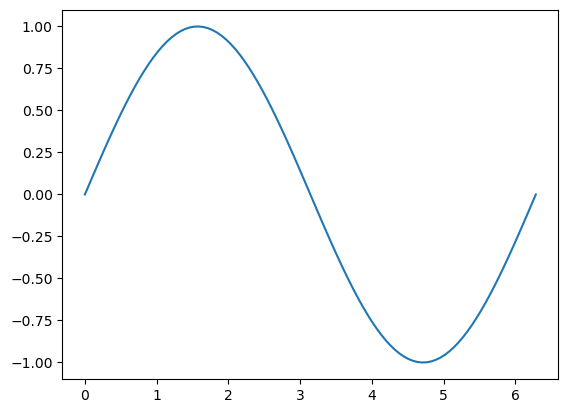

In [207]:
import PyPlot
x = range(0.0, 2pi, 100)
y = sin.(x)
PyPlot.plot(x, y);

**Notes:**
- Function `range` is similar to `linspace` in both Matlab and Python; the usage here is `range(first, last, number_of_points)`, giving that many equally spaced values.
- This is our first example of vectorizing a function; it must be `sin.` not just `sin`

**Method 2** `import` specific items from a module, making them available by "first name" only;
much like `from PyPlot import plot, title` In Python:

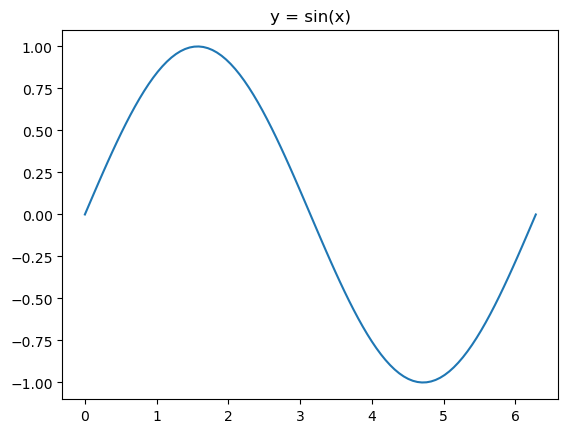

In [208]:
import PyPlot: plot, title
x = range(0, 2pi, 100)
y = sin.(x)
plot(x, y)
title("y = sin(x)");

**Method 3.** `using` a module, which makes all items available on a first-name basis full; much like a wild import
`from PyPlot import *` in Python.

But whereas Python style recommends against wild imports, this is common usage in Julia.
In this book I will avoid this with user defined modules, to avoid uncertaintly about where an item comes from.

(Confession: the above is not quite true: a module can choose to "export" only some of its items, but not others;
then `using` provides only those exported items on a first-name basis; other items must still be accessed by their full name.)

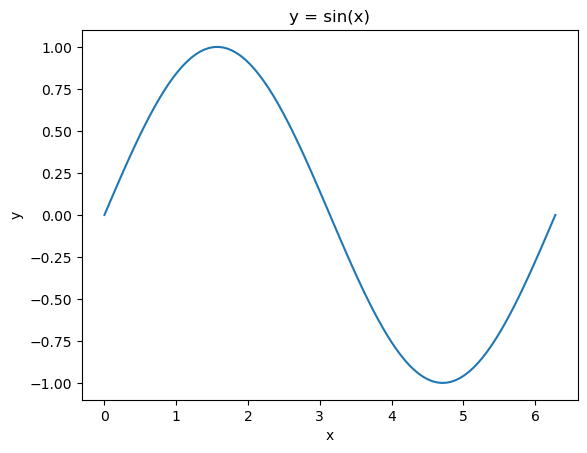

In [209]:
using PyPlot
x = range(0, 2pi, 100)
y = sin.(x)
plot(x, y)
title("y = sin(x)")
xlabel("x")
ylabel("y");

**Note:** those one character labels still need to be in double quotes;
the argument is a string, not a character.

<a name="functions1"></a>
## Functions, part I

Julia's function system is quite innovative, powerful, flexible — and therefore rather complicated to describe.
So I start with just the simplest cases.

### One liners

A very simple syntax for function that just evaluates a single formula is:

In [210]:
f(x) = 2x^2 - 6x + 4;

(Multiplication by juxtoposition is nice here!)

Note: semi-colon suppression is used here because the expression defining a function returns a value:
some information about the function.

This can be used for graphing, but must be vectorized:

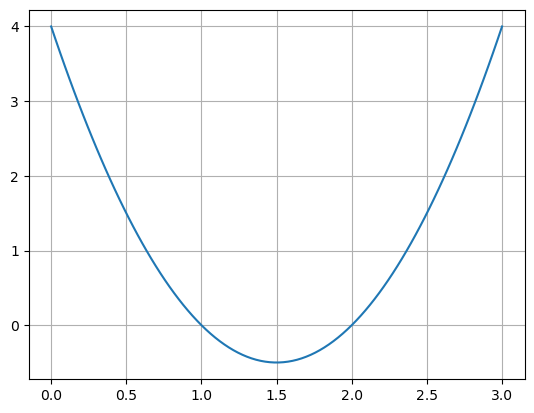

In [211]:
x = range(0, 3, 100)
plot(x, f.(x))
grid(true)

### Functions defined by a block of code

The more general syntax is `function  ... end`, which for the above example is

In [212]:
function f(x)
    2x^2 - 6x + 4
end;

In [213]:
a = 2
b = -6
vertex = -b/(2a)
println("The vertex is at $vertex, giving minimum value $(f(vertex))")

The vertex is at 1.5, giving minimum value -0.5


### The keyword `return`

This is fine if the output value is always computed on the last line of code,
but for more flexibility (and to my mind, better readability) there is the keyword `return`:

In [214]:
function f(x)
    return 2x^2 - 6x + 4
end;

This time the style is more "Pythonic", since the output variables are specifed in the `return` line rather than on the `function` line as Matlab does.
This allows different calls of the function to return different type of value:

In [215]:
function squareroots(x)
    if x > 0
        return sqrt(x), -sqrt(x)
    elseif x == 0
        return 0
    else
        println("I can only handle real roots; sorry.")
    end
end;

In [216]:
squareroots(3.0)

(1.7320508075688772, -1.7320508075688772)

In [217]:
squareroots(0.0)

0

In [218]:
squareroots(-1.0)

I can only handle real roots; sorry.


<a name="vectorizationoffunctions"></a>
(vectorization-of-functions)=
## Vectorization of Functions

One innovation in Julia is that the dot notation introduced above for
[arithmetic on arrays](#arithemeticonarrays) can also be used to vectorize a function; both ones provided by Julia and ones defined in your code.

A function `f(x)` whose code expects a number `x` or one `g(x, y)` that expects several numbers can be used on compatable arrays with

    Y = f.(X)
    Z = g.(X,Y)
    
 The former is thus roughly a short-hand for
 
     for i in length(X)
         Y[i] = f(X[i])
     end
     
This is used quite a lot in the next section.

<a name="plottingwithpyplot"></a>
## Plotting graphs: a bit more about PyPlot

There are many graphics packages for Julia; this book uses `PyPlot`.
The name is because this is a front end to the Python package `matplotlib.pyplot` and in turn that name reflects the fact that Matplotlib mimics Matlab's plotting tools, so this choice makes it easiest for readers familiar with one of those languages.

To install PyPlot, see the notes on [getting PyPlot](installing-julia-and-packages#pyplot) in {doc}`installing-julia-and-packages`

<a name="lstrings"></a>
### L-Strings for inserting LaTeX mathematical markup

Mathematical formulas can be used in the annotations on graphs by the use of **L-strings**:
string prefixed with 'L' and containing LaTeX mathematical markup between '$' signs.

For now I just illustrate all this with a few examples.

In [219]:
using PyPlot

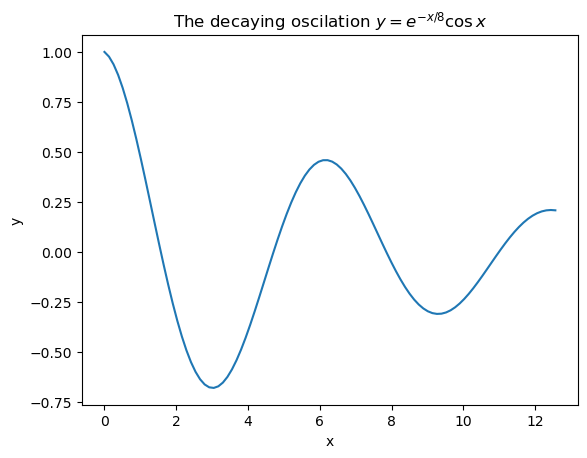

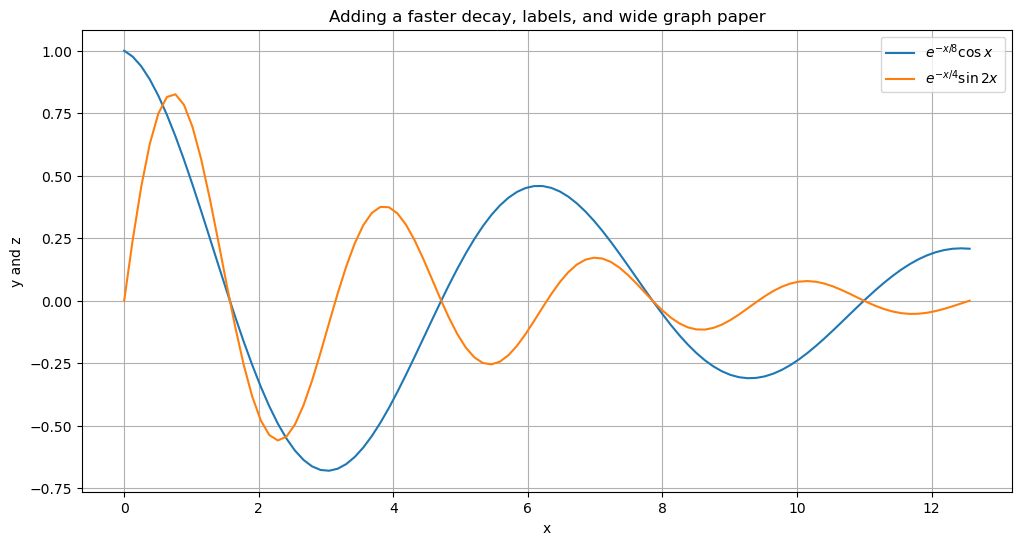

In [220]:
x = range(0, 4pi, 100)
y = exp.(-x/8) .* cos.(x)

figure()
title(L"The decaying oscilation $y = e^{-x/8} \cos x$")
plot(x, y)
xlabel("x")
ylabel("y")

figure(figsize=[12,6])
z = exp.(-x/4) .* sin.(2x)
title("Adding a faster decay, labels, and wide graph paper")
plot(x, y, label=L"$e^{-x/8} \cos x$")
plot(x, z, label=L"$e^{-x/4} \sin 2x$")
xlabel("x")
ylabel("y and z")
legend()
grid(true)

---

*To Be Continued ...*